# Homework 3 - Unsupervised learning 

## *Zhiyun (David) Lu*
Netid: zl303


# 1) Cluster some data of your choice
### (6 points total)


**(a)** First: get some data. You can pick any data source on the internet as long as it is not directly connected to some notebooks analyzing the data. In practice this excludes e.g. the data sets included in Scikit-Learn and most of the datasets on Kaggle. But there are many other possible sources as you can see e.g. on https://www.v7labs.com/blog/best-free-datasets-for-machine-learning . The best idea is to search for free data download sites related to some topic of your interest.

If you use a data source which requires an API key, you obtain one extra credit. You have to describe reproducibly how you got the data (including your own API key). https://github.com/public-apis/public-apis is a good starting point for this type of data. It is not a problem if the usage of the API is well documented. In fact, you want that.

In either case: before you get started, sent me an email with the URL of the data source so I can approve it. Also each source can only be used once, this is done one a first come, first served basis.

After the question of the source is settled: download a dataset with at least 8 features and at least 1000 datapoints. This is unsupervised learning, if you have a target variable, you should either treat it as an additional feature, or ignore it until you get to your analysis.
(1 point).  

**(b)** Cluster the data either with k-means of GMM. Try to find the optimal k with the measures discussed in class. Discuss the result, where possible including domain knowledge. (2 points)

**(c)** Cluster the data either with DBSCAN or agglomerative clustering. Try to find the optimal parameter(s) for the chosen method. Discuss the result, where possible including domain knowledge. (2 points)

**(d)** Write a one paragraph summary what you have learned from the analysis. (1 point)

**ANSWER**

**(a)** To get your API key for the ebird API, you need to first create an account on ebird.org. Then click "Request Data" on the bottom of the page in the
"Science" column. Through links on the new page, submit a request to access the eBird API stating your organization and purpose. The key should show up. Now
 you should take a photo or memorize the key.

In [26]:
# a
import requests

# observations in india in the last 30 days
# If you want to go back further than 30 days, you need to write your own for loop to aggregate and filter historic data
# India is picked instead of China for abundance of data
#url = "https://api.ebird.org/v2/data/obs/IN/recent/?back=30"

#payload={}
#headers = {
#  'X-eBirdApiToken': 'his8tb7djush'
#}

#response = requests.request("GET", url, headers=headers, data=payload)

In [27]:
# a
# to dataframe
import pandas as pd

# convert from json
#df = pd.read_json(response.text)

# save for reuse since the data the updated realtime
#df.to_csv('data.csv',index_label=False)

# load from file
df = pd.read_csv('data.csv')

df

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,asikoe2,Asian Koel,Eudynamys scolopaceus,L22576253,"Thukrai, Rajasthan, IN (25.031, 75.074)",2023-02-20 22:04,5.0,25.030915,75.073937,True,False,True,S129066489,NaN
1,commyn,Common Myna,Acridotheres tristis,L22576253,"Thukrai, Rajasthan, IN (25.031, 75.074)",2023-02-20 22:04,6.0,25.030915,75.073937,True,False,True,S129066489,NaN
2,compea,Indian Peafowl,Pavo cristatus,L22576253,"Thukrai, Rajasthan, IN (25.031, 75.074)",2023-02-20 22:04,2.0,25.030915,75.073937,True,False,True,S129066489,NaN
3,houspa,House Sparrow,Passer domesticus,L22576253,"Thukrai, Rajasthan, IN (25.031, 75.074)",2023-02-20 22:04,19.0,25.030915,75.073937,True,False,True,S129066489,NaN
4,houcro1,House Crow,Corvus splendens,L22576253,"Thukrai, Rajasthan, IN (25.031, 75.074)",2023-02-20 22:04,22.0,25.030915,75.073937,True,False,True,S129066489,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,sllcra1,Slaty-legged Crake,Rallina eurizonoides,L6969866,Vanoshi Forest Homestay,2023-01-22 15:34,1.0,15.722163,73.978903,True,False,False,S126904931,NaN
1117,swagoo1,Swan Goose,Anser cygnoides,L20989948,sailana talab,2023-01-22 09:00,6.0,23.450191,74.946465,True,False,True,S126846974,X
1118,sedwar1,Sedge Warbler,Acrocephalus schoenobaenus,L5155964,Ezhome,2023-01-22 08:34,1.0,12.030480,75.293309,True,True,False,S126680811,NaN
1119,baepoc1,Baer's Pochard,Aythya baeri,L5441428,Kokilamukh- Bar Saral beel,2023-01-22 07:15,2.0,26.839187,94.207807,True,True,False,S126766916,NaN


**(b)** Sadly, not all features are usable, for those that are indeed usable, some pre-processing is also needed.

In [28]:
# Remove everything specifying species since there are too many to one hot encode
# Lat and lng is enough to specify location and better than 'locId' 'locName' one hot encoded
# Way too many submissionIds to on hot encode and probably not useful for our purpose
df_processed = df.drop(['speciesCode','comName', 'sciName','locId','locName','subId'],axis=1)
df_processed.head()

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory
0,2023-02-20 22:04,5.0,25.030915,75.073937,True,False,True,NaN
1,2023-02-20 22:04,6.0,25.030915,75.073937,True,False,True,NaN
2,2023-02-20 22:04,2.0,25.030915,75.073937,True,False,True,NaN
3,2023-02-20 22:04,19.0,25.030915,75.073937,True,False,True,NaN
4,2023-02-20 22:04,22.0,25.030915,75.073937,True,False,True,NaN


In [29]:
# exploration

# dataset summary
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1120
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   obsDt            1121 non-null   object 
 1   howMany          1112 non-null   float64
 2   lat              1121 non-null   float64
 3   lng              1121 non-null   float64
 4   obsValid         1121 non-null   bool   
 5   obsReviewed      1121 non-null   bool   
 6   locationPrivate  1121 non-null   bool   
 7   exoticCategory   4 non-null      object 
dtypes: bool(3), float64(3), object(2)
memory usage: 55.8+ KB


In [30]:
# check for missing values in all the columns
df_processed.isnull().sum()

obsDt                 0
howMany               9
lat                   0
lng                   0
obsValid              0
obsReviewed           0
locationPrivate       0
exoticCategory     1117
dtype: int64

In [31]:
# one hot encode "exoticCategory"
# "N" means naturalized exotic species
# "X" means escapee exotic species
# If missing it is not a exotic species, no need for imputation
df_processed = pd.get_dummies(df_processed, columns=['exoticCategory'])
df_processed.head()

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory_N,exoticCategory_X
0,2023-02-20 22:04,5.0,25.030915,75.073937,True,False,True,0,0
1,2023-02-20 22:04,6.0,25.030915,75.073937,True,False,True,0,0
2,2023-02-20 22:04,2.0,25.030915,75.073937,True,False,True,0,0
3,2023-02-20 22:04,19.0,25.030915,75.073937,True,False,True,0,0
4,2023-02-20 22:04,22.0,25.030915,75.073937,True,False,True,0,0


In [32]:
# True and false to 1 and 0
df_processed['obsValid'] = df_processed['obsValid'].astype(int)
df_processed['obsReviewed'] = df_processed['obsReviewed'].astype(int)
df_processed['locationPrivate'] = df_processed['locationPrivate'].astype(int)

df_processed.head()

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory_N,exoticCategory_X
0,2023-02-20 22:04,5.0,25.030915,75.073937,1,0,1,0,0
1,2023-02-20 22:04,6.0,25.030915,75.073937,1,0,1,0,0
2,2023-02-20 22:04,2.0,25.030915,75.073937,1,0,1,0,0
3,2023-02-20 22:04,19.0,25.030915,75.073937,1,0,1,0,0
4,2023-02-20 22:04,22.0,25.030915,75.073937,1,0,1,0,0


In [33]:
# Convert date to number of days since a epoch
from datetime import datetime

# converter function
def converter(date_string):
  epoch = datetime(2023,1,1)
  dt = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
  delta = dt - epoch
  return delta.seconds

# apply converter
df_processed['obsDt'] = df_processed['obsDt'].apply(converter)

df_processed.head()

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory_N,exoticCategory_X
0,79440,5.0,25.030915,75.073937,1,0,1,0,0
1,79440,6.0,25.030915,75.073937,1,0,1,0,0
2,79440,2.0,25.030915,75.073937,1,0,1,0,0
3,79440,19.0,25.030915,75.073937,1,0,1,0,0
4,79440,22.0,25.030915,75.073937,1,0,1,0,0


In [34]:
# imputation for howMany
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")

df_processed = pd.DataFrame(data=imputer.fit_transform(df_processed), columns=df_processed.columns)

In [35]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Using the same scaler
scaler = StandardScaler()

df_processed = pd.DataFrame(data=scaler.fit_transform(df_processed), columns=df_processed.columns)

df_processed.head()

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory_N,exoticCategory_X
0,3.331301,-0.024250,0.254566,-0.92833,0.0,-0.339739,0.870088,-0.029881,-0.051801
1,3.331301,-0.017559,0.254566,-0.92833,0.0,-0.339739,0.870088,-0.029881,-0.051801
2,3.331301,-0.044325,0.254566,-0.92833,0.0,-0.339739,0.870088,-0.029881,-0.051801
3,3.331301,0.069432,0.254566,-0.92833,0.0,-0.339739,0.870088,-0.029881,-0.051801
4,3.331301,0.089507,0.254566,-0.92833,0.0,-0.339739,0.870088,-0.029881,-0.051801


In [36]:
#GMM
import numpy as np
# fit with k-means
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

lowest_bic = np.infty
bic = []

n_components_range = range(1, 100)

for n_components in n_components_range:
    # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(df_processed)
    bic.append(gmm.bic(df_processed))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]

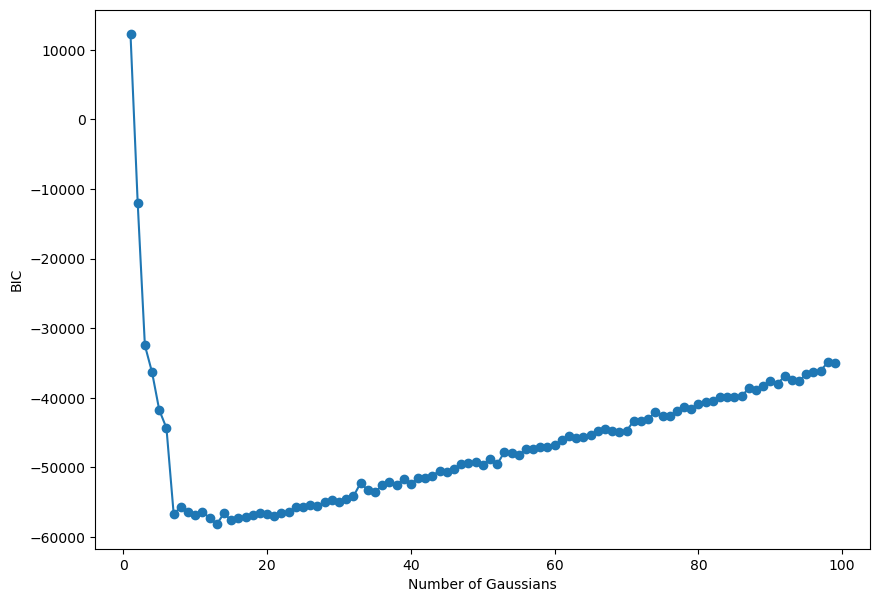

In [37]:
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.plot(n_components_range, bic, '-o')
plt.xlabel('Number of Gaussians')
plt.ylabel('BIC')
plt.show()

In [38]:
# fit with k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_avg = []
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_processed)
    Sum_of_squared_distances.append(km.inertia_)
    if k>1:
        silhouette_avg.append(silhouette_score(df_processed, km.labels_))

/home/david/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

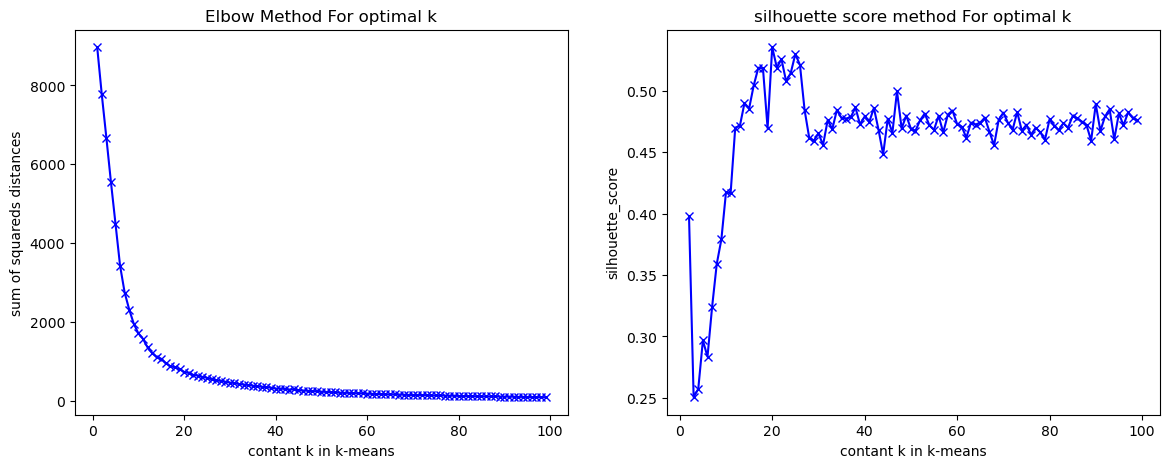

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('contant k in k-means')
plt.ylabel('sum of squareds distances')
plt.title('Elbow Method For optimal k')

plt.subplot(122)
plt.plot(range(2,100), silhouette_avg, 'bx-')
plt.xlabel('contant k in k-means')
plt.ylabel('silhouette_score')
plt.title('silhouette score method For optimal k')

plt.show()

In [40]:
print("For k-means the optimal k is {}".format(np.argmax(silhouette_avg) + 2))
print("For GMM optimal k is {}".format(np.argmin(bic) + 1))

For k-means the optimal k is 20
For GMM optimal k is 13


In [41]:
# we look at the centroid of the GMM since the mean is more meaningful
# build model based on k
gmm = GaussianMixture(n_components=np.argmin(bic),n_init=10)
gmm.fit(df_processed)

# get centroids and reverse the standardization
centroids = gmm.means_
dt_c1 = pd.DataFrame(data=scaler.inverse_transform(centroids),columns=df_processed.columns)

# convert to int for easy viewing
dt_c1.astype(int)

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory_N,exoticCategory_X
0,34246,2,26,91,1,0,1,0,0
1,37620,2,12,79,1,0,0,0,0
2,79439,14,25,75,1,0,0,0,0
3,43194,2,23,83,1,1,0,0,0
4,29020,2,21,76,1,0,0,0,0
5,26220,4999,26,71,1,0,0,0,0
6,39459,5,27,75,1,0,1,0,0
7,36481,3,28,75,1,0,0,0,0
8,37152,2,11,81,1,0,0,0,0
9,39190,51,22,81,1,0,0,0,0


While the optimum k doesn't correspond to any domain knowledge I know, GMM and k-mean are giving somewhat similar results for k-means. My guess is that the algorithm is picking up groups of bird watcher behavior. Also notably none of the centroids has exotic category and all of them have valid observation. The variation is mainly in date, location, number of birds observed, and whether the location is private. Finally, out of the centroids, private locations often correspond with a lower count of birds.

In [42]:
# c
# DBSCAN
# trying different epsilons
#
from sklearn.cluster import DBSCAN
for i in range(100):
    print('{:.3f}'.format((i+1)*0.025))
    db = DBSCAN(eps= (i+1)*0.025, min_samples=10)
    db.fit(df_processed)
    labels = db.labels_
    n_noise = list(labels).count(-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    print("Estimated number of clusters: {:}".format(n_clusters))
    print("Estimated number of noise points: {:}".format(n_noise))

0.025
Estimated number of clusters: 8
Estimated number of noise points: 996
0.050
Estimated number of clusters: 10
Estimated number of noise points: 957
0.075
Estimated number of clusters: 12
Estimated number of noise points: 888
0.100
Estimated number of clusters: 15
Estimated number of noise points: 829
0.125
Estimated number of clusters: 17
Estimated number of noise points: 767
0.150
Estimated number of clusters: 17
Estimated number of noise points: 732
0.175
Estimated number of clusters: 19
Estimated number of noise points: 676
0.200
Estimated number of clusters: 18
Estimated number of noise points: 655
0.225
Estimated number of clusters: 18
Estimated number of noise points: 604
0.250
Estimated number of clusters: 16
Estimated number of noise points: 576
0.275
Estimated number of clusters: 16
Estimated number of noise points: 545
0.300
Estimated number of clusters: 13
Estimated number of noise points: 524
0.325
Estimated number of clusters: 13
Estimated number of noise points: 475


In [43]:
# Since we are already getting good results, we won't be testing different min samples
# By the kmeans and GMM we assume number of clusters close to 10
# Let us take eps=1.75
db = DBSCAN(eps=0.725, min_samples=10)
db.fit(df_processed.to_numpy())

labels = db.labels_
#compute the centroids by hand
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
centroids = None
for k in range(n_clusters):
    points_of_cluster = df_processed.to_numpy()[labels==k,:]
    centroid_of_cluster = (np.mean(points_of_cluster, axis=0)).reshape(1,-1)
    if centroids is None:
        centroids = centroid_of_cluster
    else:
        centroids = np.concatenate((centroids, centroid_of_cluster), axis=0)

In [44]:
dt_c2 = pd.DataFrame(data=scaler.inverse_transform(centroids),columns=df_processed.columns)
dt_c2.astype(int)

,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,exoticCategory_N,exoticCategory_X
0,33781,3,24,84,1,0,1,0,0
1,35135,4,21,76,1,0,0,0,0
2,30865,3,9,93,1,0,1,0,0
3,33277,2,26,92,1,0,0,0,0
4,26241,3,10,92,1,0,0,0,0
5,61166,12,24,71,1,0,1,0,0
6,61585,1,15,75,1,0,0,0,0
7,49716,3,33,76,1,0,1,0,0
8,34478,4,29,77,1,1,0,0,0
9,30108,1,25,91,1,1,0,0,0


 Sadly the results don't correspond to any domain knowledge I know, but by having 10 clusters, the clustering seems a bit similar to the results of GMM. Also while we can't say private location corresponds to very low number of "howMany" reported, they don't seem too high.

**(d)** Sadly the clustering doesn't correspond to any domain knowledge I know. The clusters might correspond to different groups of bird watcher behavior. While there is some evidence about lower numbers in flocks for private sites, but evidence between different clustering method is not consistent on this.